                                            Email Network Analysis
                                            
The goal of this project is to analyze the internal email communication network between employees of a mid-sized manufacturing company. Each node represents an employee and each directed edge between two nodes represents an individual email. The left node represents the sender and the right node represents the recipient, as shown in the below figure.

![image.png](image.png)

First, the network should be loaded as a directed graph since sending and receiving email is a directed relation. 
                                  

In [275]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm
import numpy as np
import collections
import random
import itertools
import seaborn as sns
import scipy.stats as stats


G= nx.read_edgelist("email_network.txt", create_using = nx.DiGraph(), nodetype=int, data=[('time', int)])

The graph contains 167 nodes (employees) and 82927 edges (emails sent). Next let's visualize the graph
in the next figure. The size of a node in the figure is proportional to the out-degree of the node.

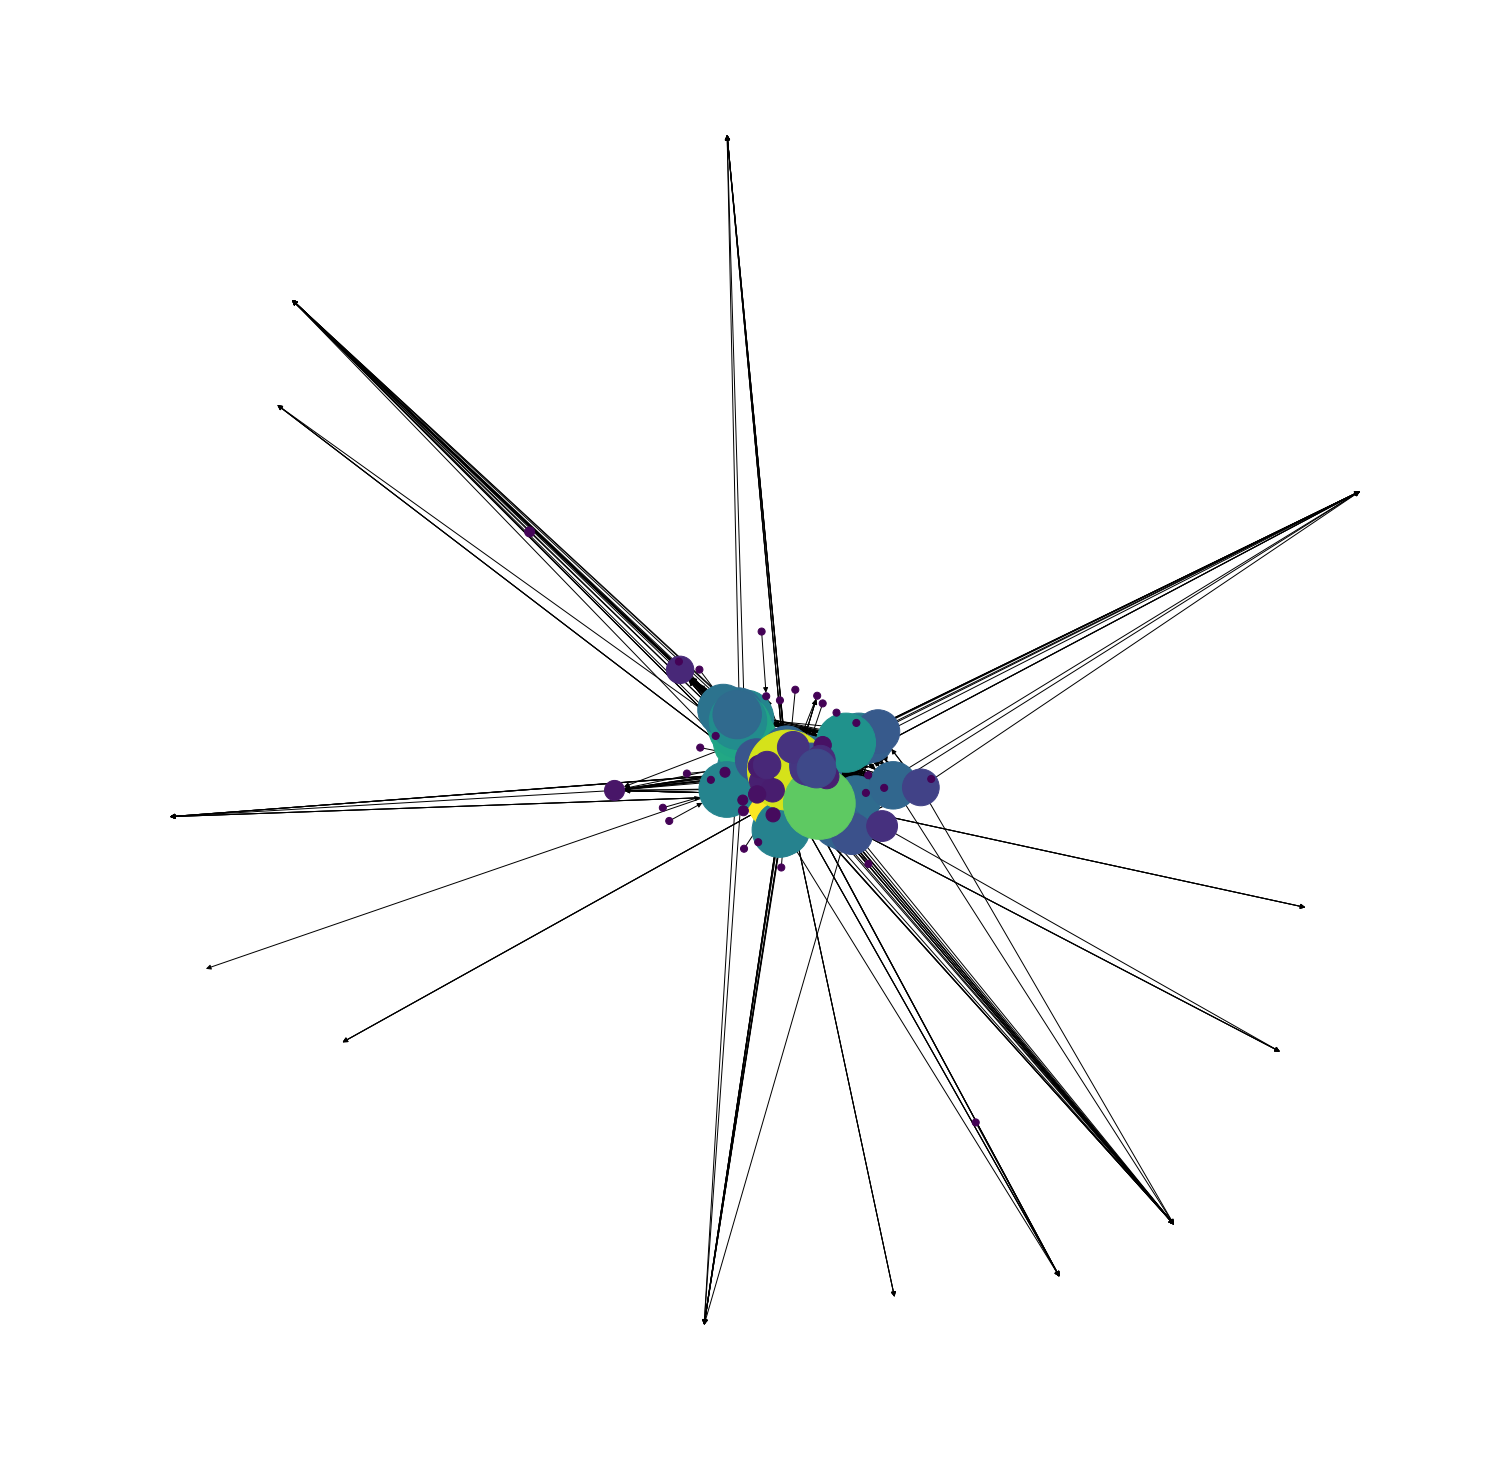

In [10]:
temp=list(G.out_degree())
out_degrees=np.reshape(temp,(len(temp),2))
node_color = [20000.0 * v for v in out_degrees[:,1]]
node_size =  [v*50  for v in out_degrees[:,1]]
plt.figure(figsize=(20,20))
nx.draw(G, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.show()

Assuming that when an employee sends an email to another employee, a communication channel is created, allowing the sender to provide information to the receiver, but not vice versa, we want to know if it is possible for information to go from every employee to every other employee in this network .

This will only be possible if the graph is strongly connected, i.e. has only one strongly connected component. This network is not strongly connected since it has 42 strongly-connected components(SCC). The strongly connected components and the histogram for the size of each SCC is shown in the below diagram. The biggest SCC has 126 nodes(drawn in the center with purple) and the rest of SCCs have one node each.

[126, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


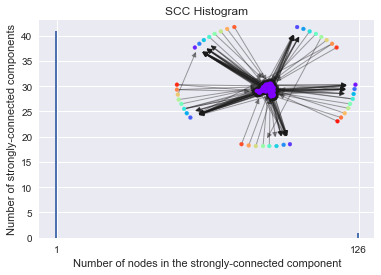

In [276]:
def create_position(G):
    angel=np.linspace(0,360,42)
    x=y=0
    position={}
    SCCs = sorted(nx.strongly_connected_component_subgraphs(G),key=len, reverse=True)
    for i,scc in enumerate(SCCs):
        for node in scc:
            position[node]=(x,y)
            x=random.randint(x-2,x+2)
            y=random.randint(y-2,y+2)
        x =int(100*np.cos(angel[i]))
        y= int(100*np.sin(angel[i]))
    return position

def create_color(G):
    colors={}
    SCCs = sorted(nx.strongly_connected_component_subgraphs(G),key=len, reverse=True)
    for i,scc in enumerate(SCCs):
        c = cm.rainbow(int(255 *i/42))
        for node in scc:
            G.node[node]['color']=c
    return G

pos=create_position(G)
G=create_color(G)
Gc = [len(Gc) for Gc in sorted(nx.strongly_connected_component_subgraphs(G),key=len, reverse=True)]
degree_sequence = Gc
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=1, color='b')

plt.title("SCC Histogram")
plt.ylabel("Number of strongly-connected components")
plt.xlabel("Number of nodes in the strongly-connected component")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.strongly_connected_component_subgraphs(G), key=len, reverse=True)[0]
print(Gc)
plt.axis('off')
nx.draw_networkx_nodes(G, pos,node_color = [G.node[node]['color'] for node in G], node_size=15)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

Assuming that a communication channel established by an email allows information to be exchanged both ways, we want to see if it is possible for information to go from every employee to every other employee in this network.
The graph has to be weakly connected for this purpose. This network has only one weakly connceted component which means the whole graph is weakly connceted.

In [14]:
print([len(c) for c in sorted(nx.weakly_connected_components(G),key=len, reverse=True)])

[167]


We want to know what is the average distance between nodes in largest strongly connected component of this network.
The average distance between nodes in largest strongly connected component of this network is 1.6461587301587302.

Also as demonstrated in the below diagram, inside the largest SCC, all  the nodes are reachable from one another with at most 3 hops. Therefore, the diameter of the largest SCC is 3.

0
average distance between nodes is : 1.6461587301587302


C:\Users\B.shiva\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


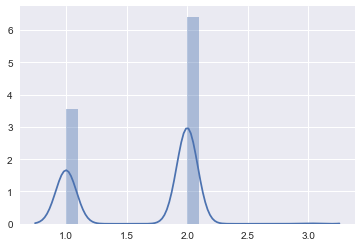

In [240]:
G_scc= max(nx.strongly_connected_component_subgraphs(G), key=len)

print("average distance between nodes is :", nx.average_shortest_path_length(G_scc))
nodes=G_scc.nodes()
node_pairs=itertools.combinations(nodes,2)
distance=[]
for p in node_pairs:
    distance.append(nx.shortest_path_length(G,source=p[0],target=p[1]))
    
sns.set(color_codes=True)
sns.distplot(distance)
plt.show()

Now we want to compute the periphery of our greatest strongly connected subgraph. The periphery of a graph means the set of nodes with eccentricity equal to the diameter. 

{97, 129, 134} 

[97, 14, 1, 6]
[129, 1, 37, 134]
[134, 1, 9, 92]


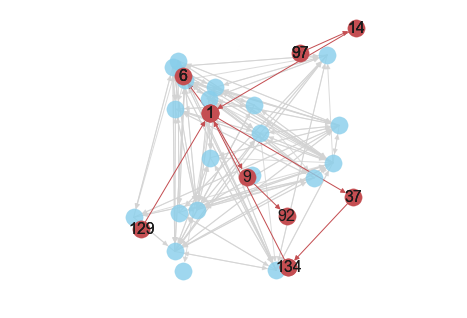

In [134]:
periphery=set(nx.periphery(G_scc))
print(periphery, '\n')
G_scc_nodes=G_scc.nodes()
pos = nx.random_layout(G_scc)
selected_nodes=list(G_scc.nodes)[60:80]
subg=G_scc.subgraph(selected_nodes)
nx.draw(subg,pos,node_color='skyblue',edge_color='lightgray', alpha=0.8)

labels={}
for ecc in periphery:
    for node in G_scc_nodes:
        if(nx.shortest_path_length(G_scc, ecc, node)==3):
            path=nx.shortest_path(G_scc, ecc, node)
            print(path)
            path_edges = zip(path,path[1:])
            for n in path:
                labels[n]=n
            nx.draw_networkx_nodes(G_scc,pos,nodelist=path,node_color='r')
            nx.draw_networkx_edges(G_scc,pos,edgelist=list(path_edges),edge_color='r')
            nx.draw_networkx_labels(G_scc,pos,labels,font_size=16,font_color='k')
            break

            
plt.axis('equal')
plt.show()           


For finding the center of the largest SCC we have to find the set of node(s) in the largest SCC with eccentricity equal to the radius. The radius of this network is 1 and as shown below the network has only one node as its center, node 38.
This means all the nodes belonging to the largest SCC are distance-1 reachable from the node 38.

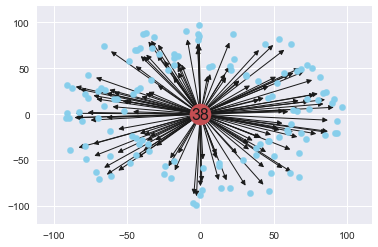

In [274]:
center=set(nx.center(G_scc))
x=y=0
position={}
for node in G_scc_nodes:
    if node in center:
        position[node]=(0,0)
    elif(not node in center):
        radius=random.randint(50,100)
        theta=random.randint(0,360)
        x =int(radius*np.cos(theta))
        y= int(radius*np.sin(theta))
        position[node]=(x,y)
labels={}

labels[38]='38'
nx.draw_networkx_nodes(G_scc,position,node_color='skyblue',node_size=40)
nx.draw_networkx_nodes(G_scc,position,nodelist=list(center),node_color='r',node_size=450)
nx.draw_networkx_labels(G_scc,position,labels,font_size=16,font_color='k')
nx.draw_networkx_edges(G_scc,pos=position,edgelist=G_scc.out_edges(38))
plt.show()

Which node in the greatest SCC has the most shortest paths to other nodes whose distance equal the diameter? 
How many nodes are connected to this node?
The desired node is 97 and there are 63 such shortest paths that have length equal to the diameter of the greatest SCC

In [203]:
diameter = nx.diameter(G_scc)
max_count = -1
result_node = None
for node in periphery:
    sp = nx.shortest_path_length(G_scc, node)
    count = list(sp.values()).count(diameter)
    if count > max_count:
        result_node = node
        max_count = count
print(' node:',result_node,'\n','number of chosen shortest paths:',max_count)

 node: 97 
 number of chosen shortest paths: 63


Suppose we want to prevent communication from flowing to the node 97 from any node in the center of G_sc, we want to know what is the smallest number of nodes we need to remove from the graph in order to do so.

The minimum number of nodes required to be removed equals to the size of the min-cut with the center node as  source node and node 97 as target node. As seen below five nodes need to be removed for this purpose.

In [242]:
c = nx.center(G_scc)[0]
print(len(nx.minimum_node_cut(G_scc, c, result_node)))

5


Construct an undirected graph from the subgraph induced by the largest component on the email-net directed multi-graph. 
The next figure shows the undirected graph constructed.The node size is proportional to the degree of the node.

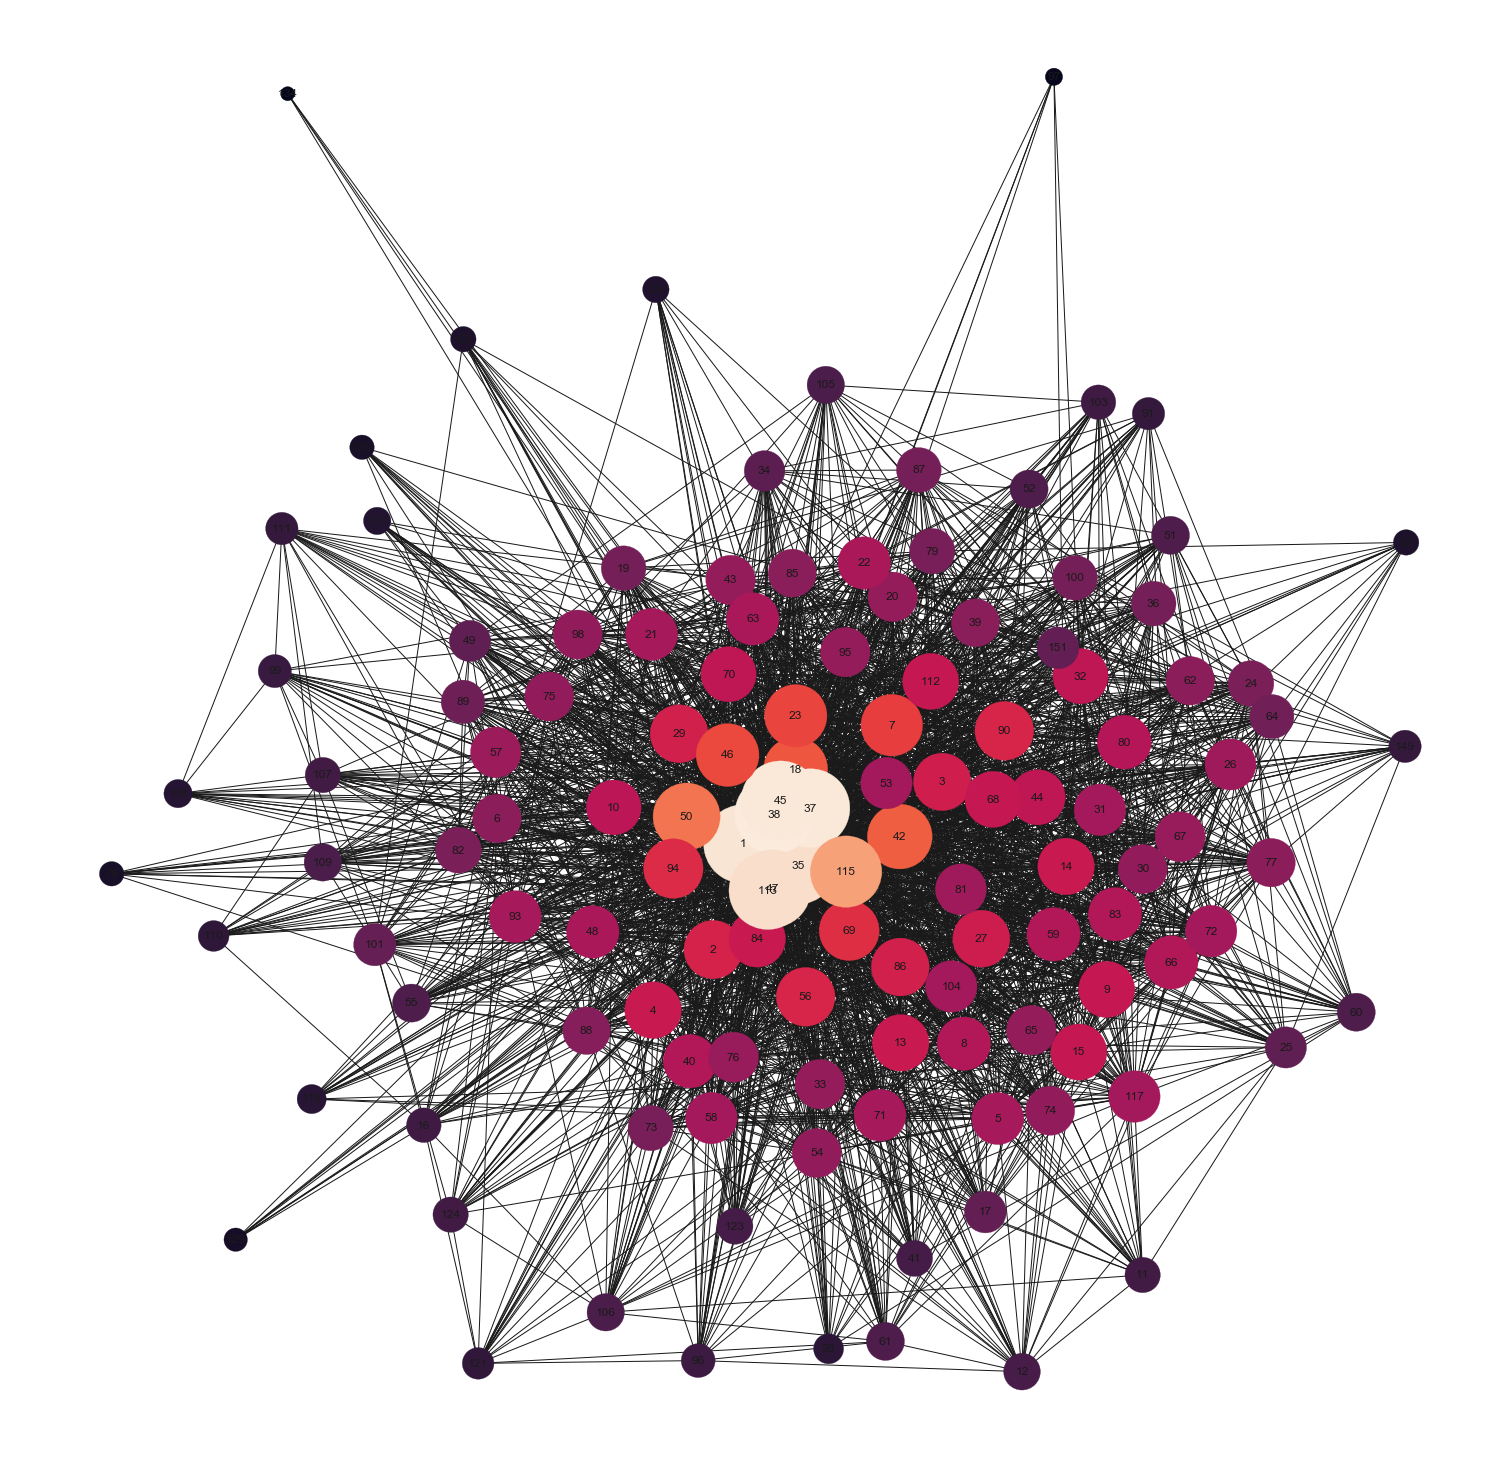

In [255]:
undir_subgraph = G_scc.to_undirected()
G_un = nx.Graph(undir_subgraph)

temp=list(G_un.degree())
degrees=np.reshape(temp,(len(temp),2))
node_color = [20000.0 * v for v in degrees[:,1]]
node_size =  [v*50  for v in degrees[:,1]]
plt.figure(figsize=(20,20))
nx.draw(G_un, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.show()
#nx.draw_networkx(G_un, pos=nx.spring_layout(G_un), node_size=100, node_color='skyblue', edge_color='lightgray')

What is the transitivity and average clustering coefficient of the undirected graph? 

In [256]:
print(nx.transitivity(G_un), nx.average_clustering(G_un))

0.570111160700385 0.6975272437231418
